Process prevalence data for input into models

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

In [3]:
df = pd.read_csv('UKPrevalence.csv')
Nd = len(df["incidence"])
df["prevalence"] = np.zeros(Nd)
df["prevalence"].iloc[0:10] = df["cumulative incidence"][0:10].to_numpy()
df["prevalence"].iloc[10:Nd] = df["cumulative incidence"][10:Nd].to_numpy() -\
                              df["cumulative incidence"][0:Nd-10].to_numpy()
df["UK population"] = df["cumulative incidence"]/df["cumulative fraction"]

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


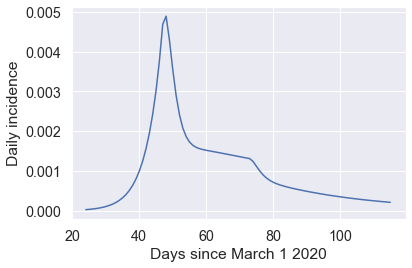

In [7]:
plt.plot(df["incidence"][24:116]/df["UK population"][24:116])
plt.xlabel('Days since March 1 2020')
plt.ylabel('Daily incidence')
plt.tight_layout()
plt.savefig('incidence.png')

In [4]:
print(df["Date"][24],df["Date"][115])

01/03/2020 31/05/2020


In [5]:
df1 = pd.DataFrame({"Incidence": df["incidence"][24:116].to_numpy()/\
                                 df["UK population"][24:116].to_numpy(),\
                    "Prevalence": df["prevalence"][24:116].to_numpy()/\
                                  df["UK population"][24:116]})
df1.to_csv("inc_prev.csv")